In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date
import math
from math import sqrt, exp
from scipy.stats import norm
import requests_cache
# imports
!pip install requests_cache --upgrade
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import requests_cache

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

#!usr/bin/env python
#-*- coding:utf-8 -*-
from __future__ import division
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from math import sqrt, exp
from scipy.stats import norm
from tqdm import tqdm

Requirement already up-to-date: requests_cache in /Users/dylan/opt/anaconda3/lib/python3.8/site-packages (0.8.1)


## The best stock that we are using is Fidelity Advisor® Semiconductors Fund (FELAX)

In [2]:
# Pull stock data from yahoo finance
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite')
session.headers = {     'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',     'Accept': 'application/json;charset=utf-8'     }

def get_data_for_multiple_stocks(tickers,start_date='2018-12-31',end_date= '2020-12-31'):
    
    stocks = dict()
    stocks_log_returns = pd.DataFrame()
    stocks_adj_close = dict()
    # loop through all the tickers
    for ticker in tickers:
        
        # get the data for the specific ticker
        s = DataReader(ticker, 'yahoo', start_date, end_date, session = session)
      
        s.insert(0, "Ticker", ticker)  # insert ticker column
        
        s['Prev Adj Close'] = s['Adj Close'].shift(1)
        s['log_return'] = np.log(s['Adj Close']/s['Prev Adj Close'])
        stocks[ticker] = s
        stocks_log_returns[ticker] = s['log_return']
        stocks_adj_close[ticker] = s['Adj Close']
        
    return stocks, stocks_log_returns,stocks_adj_close

# Top 30 stocks in best portfolio
tickers = ['NVDA','QCOM', 'NXPI', 'MU', 'MRVL', 'AMD', 'MCHP', 'AVGO', 'XLNX', 'LRCX'
    ,'ON', 'INTC', 'TXN', 'ENPH', 'AMAT', 'CRUS', 'JBL', 'ADI', 'OLED', 'TSM'
    , 'IIVI', 'DIOD', 'AEIS', 'MTSI', 'TTMI', 'FLEX', 'MXL', 'SMTC', 'SYNA', 'AOSL']

num_shares = {'NVDA': 174023, 'QCOM': 210726, 'NXPI': 182512, 'MU': 373512, 'MRVL': 542087, 'AMD': 275700, 'MCHP': 165301, 'AVGO': 51125
              , 'XLNX': 156450, 'LRCX': 46346, 'ON': 631906, 'INTC': 368764, 'TXN': 82700, 'ENPH': 77000, 'AMAT': 118600, 'CRUS': 115528
              , 'JBL': 157876, 'ADI': 41870, 'OLED': 24671, 'TSM': 49100, 'IIVI': 59400, 'DIOD': 61900, 'AEIS': 39864
              , 'MTSI': 59100, 'TTMI': 233190, 'FLEX': 176327, 'MXL': 70349, 'SMTC': 35000, 'SYNA': 22300, 'AOSL': 63000}
stocks_data = get_data_for_multiple_stocks(tickers)[0]
stocks_log_returns = get_data_for_multiple_stocks(tickers)[1]
#print(stocks_data)
stocks_adj_close = get_data_for_multiple_stocks(tickers)[2]
stocks_adj_close['NVDA']


Date
2018-12-31     33.165485
2019-01-02     33.841225
2019-01-03     31.796640
2019-01-04     33.833771
2019-01-07     35.624954
                 ...    
2020-12-24    129.839996
2020-12-28    128.903214
2020-12-29    129.335373
2020-12-30    131.358871
2020-12-31    130.452057
Name: Adj Close, Length: 506, dtype: float64

In [3]:
col_names = tickers 
col_names

['NVDA',
 'QCOM',
 'NXPI',
 'MU',
 'MRVL',
 'AMD',
 'MCHP',
 'AVGO',
 'XLNX',
 'LRCX',
 'ON',
 'INTC',
 'TXN',
 'ENPH',
 'AMAT',
 'CRUS',
 'JBL',
 'ADI',
 'OLED',
 'TSM',
 'IIVI',
 'DIOD',
 'AEIS',
 'MTSI',
 'TTMI',
 'FLEX',
 'MXL',
 'SMTC',
 'SYNA',
 'AOSL']

In [4]:
for index, row in stocks_log_returns.iterrows():
    
    for name in col_names:
        
        row[name] *= num_shares[name]
    

In [5]:
stocks_log_returns

,NVDA,QCOM,NXPI,MU,MRVL,AMD,MCHP,AVGO,XLNX,LRCX,...,IIVI,DIOD,AEIS,MTSI,TTMI,FLEX,MXL,SMTC,SYNA,AOSL
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,3510.041450,1806.611611,4307.347596,11818.046632,10281.569141,5471.310374,-1315.282064,-155.053991,3055.942854,719.333182,...,-959.272838,-462.225796,388.106196,1448.403303,1433.559659,6371.210887,159.698720,212.999804,196.898693,2127.556207
2019-01-03,-10844.954620,-6335.326224,-7599.597926,-20511.688303,-24529.970025,-27377.335225,-12084.507564,-4762.735535,-6004.274650,-2290.887973,...,-4239.153835,-3724.882722,-2231.523032,-2974.979820,-18585.775247,-8468.982726,-3894.467618,-2384.969688,-1549.576058,-3692.465346
2019-01-04,10806.619834,3377.703760,8618.370348,19941.001031,15919.964898,29855.227725,6572.376969,500.029440,7081.387411,2210.395559,...,2234.376420,2809.557700,1899.092959,2214.971030,13041.990414,6672.005808,1994.669192,2126.160224,621.663592,3091.886520
2019-01-07,8977.309757,-596.550983,1349.633926,14561.553348,12211.898696,21889.121454,4769.070003,1030.756141,4079.034440,411.067062,...,1967.570173,934.650428,961.950062,2134.947667,6968.585356,2910.863588,936.099316,1260.586601,154.283174,-484.617330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-207.496556,2607.800397,546.067104,3348.989053,7424.337108,781.855730,933.257983,715.945584,0.000000,897.262392,...,714.052636,272.210767,699.387015,653.404657,1878.502985,-775.064253,1411.868863,279.276192,72.595956,-187.938803
2020-12-28,-1260.110146,-1492.331033,971.844435,423.118239,-807.070240,-631.337159,-629.669029,49.742227,-518.724248,-410.916267,...,274.119646,234.944223,-238.531227,162.230683,679.358899,-1560.424631,-230.154871,92.600280,1496.566661,1435.502518
2020-12-29,582.451683,1067.065725,-2626.607984,-2386.365187,-8723.878455,-2965.507905,-1327.727218,-337.297435,-1801.246711,-281.202381,...,-2927.392552,-1000.167287,-1260.524332,-1887.499280,-2044.043270,-4263.388151,-2086.155647,-678.203894,-363.601128,-3042.246585


## Multiply stocks by weights here once we get the weights

In [6]:
stocks_log_returns = stocks_log_returns.assign(log_returns = lambda row: row.sum(axis = 1)).reset_index()

## Historical Simulation VaR, Best Stock

In [7]:
from copy import deepcopy
df = deepcopy(stocks_log_returns)

for i in range(0, len(df)):
    past_250 = df.loc[(i-249):(i), 'log_returns']
    past_250.dropna(inplace=True)
    
    if len(past_250) == 250:
        #print(past_250)
        df.loc[i, 'VaR_95'] = past_250.quantile(0.05)       
    else:
        df.loc[i, 'VaR_95'] = np.NaN

In [8]:
df

,Date,NVDA,QCOM,NXPI,MU,MRVL,AMD,MCHP,AVGO,XLNX,...,AEIS,MTSI,TTMI,FLEX,MXL,SMTC,SYNA,AOSL,log_returns,VaR_95
0,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1,2019-01-02,3510.041450,1806.611611,4307.347596,11818.046632,10281.569141,5471.310374,-1315.282064,-155.053991,3055.942854,...,388.106196,1448.403303,1433.559659,6371.210887,159.698720,212.999804,196.898693,2127.556207,69871.426202,NaN
2,2019-01-03,-10844.954620,-6335.326224,-7599.597926,-20511.688303,-24529.970025,-27377.335225,-12084.507564,-4762.735535,-6004.274650,...,-2231.523032,-2974.979820,-18585.775247,-8468.982726,-3894.467618,-2384.969688,-1549.576058,-3692.465346,-283772.555175,NaN
3,2019-01-04,10806.619834,3377.703760,8618.370348,19941.001031,15919.964898,29855.227725,6572.376969,500.029440,7081.387411,...,1899.092959,2214.971030,13041.990414,6672.005808,1994.669192,2126.160224,621.663592,3091.886520,225238.093904,NaN
4,2019-01-07,8977.309757,-596.550983,1349.633926,14561.553348,12211.898696,21889.121454,4769.070003,1030.756141,4079.034440,...,961.950062,2134.947667,6968.585356,2910.863588,936.099316,1260.586601,154.283174,-484.617330,115089.596341,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2020-12-24,-207.496556,2607.800397,546.067104,3348.989053,7424.337108,781.855730,933.257983,715.945584,0.000000,...,699.387015,653.404657,1878.502985,-775.064253,1411.868863,279.276192,72.595956,-187.938803,31322.285117,-212975.30703
502,2020-12-28,-1260.110146,-1492.331033,971.844435,423.118239,-807.070240,-631.337159,-629.669029,49.742227,-518.724248,...,-238.531227,162.230683,679.358899,-1560.424631,-230.154871,92.600280,1496.566661,1435.502518,-4675.002610,-212975.30703
503,2020-12-29,582.451683,1067.065725,-2626.607984,-2386.365187,-8723.878455,-2965.507905,-1327.727218,-337.297435,-1801.246711,...,-1260.524332,-1887.499280,-2044.043270,-4263.388151,-2086.155647,-678.203894,-363.601128,-3042.246585,-35999.414006,-212975.30703
504,2020-12-30,2701.573704,2061.759123,4028.968932,8988.048209,14690.968015,5034.511837,1981.551434,685.326593,2441.126900,...,799.668543,2016.961486,1194.530887,3969.257909,5443.444070,717.116991,993.626855,2115.568654,87340.945005,-212975.30703


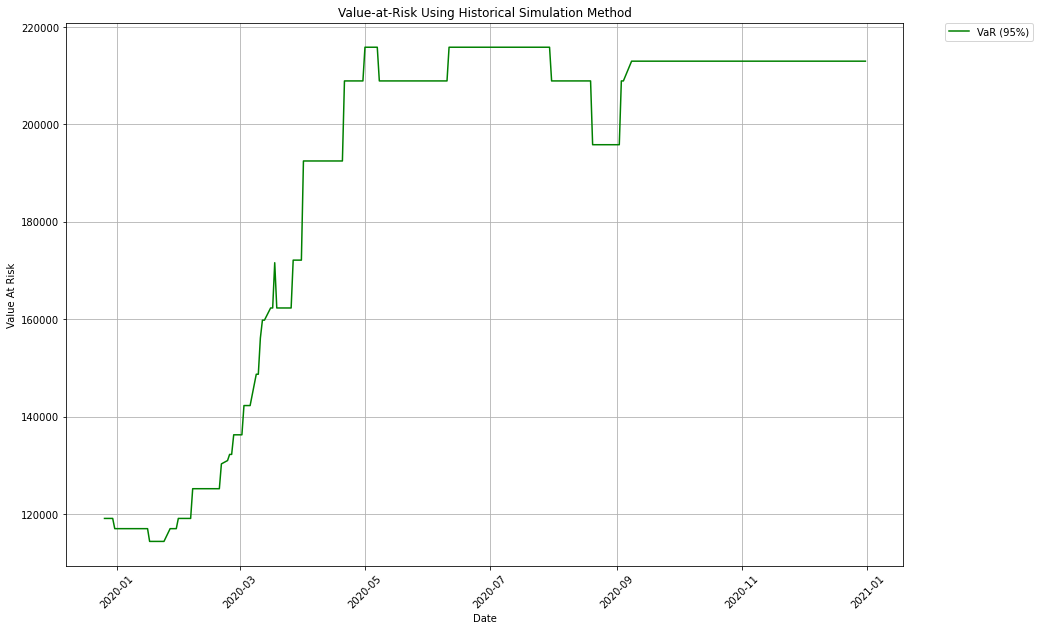

In [9]:
plt.figure(figsize=(15,10))
plt.plot(df['Date'], -df['VaR_95'], 'g-', label='VaR (95%)')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk Using Historical Simulation Method')
plt.show()

In [10]:
#create a list of all the stocks returns of each stock in the portfolio

all_returns = []

for item in stocks_data:
    stock_return = {}
    stock_return[item] = stocks_data[item]['Adj Close']#* num_shares[item]
    all_returns.append(stock_return)

all_returns 

[{'NVDA': Date
  2018-12-31     33.165485
  2019-01-02     33.841225
  2019-01-03     31.796640
  2019-01-04     33.833771
  2019-01-07     35.624954
                   ...    
  2020-12-24    129.839996
  2020-12-28    128.903214
  2020-12-29    129.335373
  2020-12-30    131.358871
  2020-12-31    130.452057
  Name: Adj Close, Length: 506, dtype: float64},
 {'QCOM': Date
  2018-12-31     52.741718
  2019-01-02     53.195831
  2019-01-03     51.620338
  2019-01-04     52.454422
  2019-01-07     52.306137
                   ...    
  2020-12-24    146.649475
  2020-12-28    145.614594
  2020-12-29    146.353821
  2020-12-30    147.792786
  2020-12-31    150.148407
  Name: Adj Close, Length: 506, dtype: float64},
 {'NXPI': Date
  2018-12-31     70.874229
  2019-01-02     72.566780
  2019-01-03     69.607224
  2019-01-04     72.972977
  2019-01-07     73.514595
                   ...    
  2020-12-24    156.010971
  2020-12-28    156.843918
  2020-12-29    154.602875
  2020-12-30    158.

In [11]:
#all_returns is a dictionary. we will make a dataframe for all the log returns for each day for each stock
returns_df = pd.DataFrame(all_returns[0])

for i in range(1,len(all_returns)):
    new_df = pd.DataFrame(all_returns[i])
    returns_df = pd.concat([new_df,returns_df],axis = 1)
    
cols = returns_df.columns
    

In [12]:
#work with returns_df from now on. note that when we find the weights here, we need to 
#multiply each stock by the weight (the number of stocks bought)

for column in returns_df.columns:
    returns_df[f'{column}_prev_return'] = returns_df[column].shift(1)

returns_df

,AOSL,SYNA,SMTC,MXL,FLEX,TTMI,MTSI,AEIS,DIOD,IIVI,...,LRCX_prev_return,XLNX_prev_return,AVGO_prev_return,MCHP_prev_return,AMD_prev_return,MRVL_prev_return,MU_prev_return,NXPI_prev_return,QCOM_prev_return,NVDA_prev_return
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,10.190000,37.209999,45.869999,17.600000,7.610000,9.73,14.510000,42.794407,32.259998,32.459999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,10.540000,37.540001,46.150002,17.639999,7.890000,9.79,14.870000,43.213078,32.020000,31.940001,...,130.249817,82.728729,228.883362,69.187401,18.459999,15.876916,31.685709,70.874229,52.741718,33.165485
2019-01-03,9.940000,35.020000,43.110001,16.690001,7.520000,9.04,14.140000,40.860538,30.150000,29.740000,...,132.287186,84.360558,228.190247,68.639069,18.830000,16.180922,32.704285,72.566780,53.195831,33.841225
2019-01-04,10.440000,36.009998,45.810001,17.170000,7.810000,9.56,14.680000,42.854218,31.549999,30.879999,...,125.907196,81.184288,207.892487,63.800167,17.049999,15.465038,30.956728,69.607224,51.620338,31.796640
2019-01-07,10.360000,36.259998,47.490002,17.400000,7.940000,9.85,15.220000,43.900902,32.029999,31.920000,...,132.057632,84.943359,209.935760,66.387970,19.000000,15.925949,32.654354,72.972977,52.454422,33.833771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,23.430000,86.150002,71.720001,36.740002,18.160000,13.71,54.570000,98.587631,68.370003,77.830002,...,467.900604,141.990005,415.833679,134.868530,91.550003,46.305637,69.852356,155.544891,144.845825,129.994904
2020-12-28,23.969999,92.129997,71.910004,36.619999,18.000000,13.75,54.720001,97.999481,68.629997,78.190002,...,477.047455,141.990005,421.697906,135.632126,91.809998,46.944195,70.481483,156.010971,146.649475,129.839996
2020-12-29,22.840000,90.639999,70.529999,35.549999,17.570000,13.63,53.000000,94.949158,67.529999,74.430000,...,472.836517,141.520004,422.108398,135.116455,91.599998,46.874355,70.561371,156.843918,145.614594,128.903214


In [13]:
returns_df

,AOSL,SYNA,SMTC,MXL,FLEX,TTMI,MTSI,AEIS,DIOD,IIVI,...,LRCX_prev_return,XLNX_prev_return,AVGO_prev_return,MCHP_prev_return,AMD_prev_return,MRVL_prev_return,MU_prev_return,NXPI_prev_return,QCOM_prev_return,NVDA_prev_return
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,10.190000,37.209999,45.869999,17.600000,7.610000,9.73,14.510000,42.794407,32.259998,32.459999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,10.540000,37.540001,46.150002,17.639999,7.890000,9.79,14.870000,43.213078,32.020000,31.940001,...,130.249817,82.728729,228.883362,69.187401,18.459999,15.876916,31.685709,70.874229,52.741718,33.165485
2019-01-03,9.940000,35.020000,43.110001,16.690001,7.520000,9.04,14.140000,40.860538,30.150000,29.740000,...,132.287186,84.360558,228.190247,68.639069,18.830000,16.180922,32.704285,72.566780,53.195831,33.841225
2019-01-04,10.440000,36.009998,45.810001,17.170000,7.810000,9.56,14.680000,42.854218,31.549999,30.879999,...,125.907196,81.184288,207.892487,63.800167,17.049999,15.465038,30.956728,69.607224,51.620338,31.796640
2019-01-07,10.360000,36.259998,47.490002,17.400000,7.940000,9.85,15.220000,43.900902,32.029999,31.920000,...,132.057632,84.943359,209.935760,66.387970,19.000000,15.925949,32.654354,72.972977,52.454422,33.833771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,23.430000,86.150002,71.720001,36.740002,18.160000,13.71,54.570000,98.587631,68.370003,77.830002,...,467.900604,141.990005,415.833679,134.868530,91.550003,46.305637,69.852356,155.544891,144.845825,129.994904
2020-12-28,23.969999,92.129997,71.910004,36.619999,18.000000,13.75,54.720001,97.999481,68.629997,78.190002,...,477.047455,141.990005,421.697906,135.632126,91.809998,46.944195,70.481483,156.010971,146.649475,129.839996
2020-12-29,22.840000,90.639999,70.529999,35.549999,17.570000,13.63,53.000000,94.949158,67.529999,74.430000,...,472.836517,141.520004,422.108398,135.116455,91.599998,46.874355,70.561371,156.843918,145.614594,128.903214


In [14]:
column_names = df.columns.drop(['log_returns','VaR_95','Date'])

## Daily calculation of log returns for each stock

In [15]:
log_returns_list = {}

for index, row in returns_df.iterrows():
    #for every column name, we find the log return for that stock for that day
    for item in column_names:
        current = item
        prev = item + "_prev_return"
        
        log_return = np.log(row[current]/row[prev])
        
        #if stock already added to log returns list
        namestr = f"{item}_log_return"
        if namestr in log_returns_list:
            log_returns_list[namestr].append(log_return)
        else: 
            log_returns_list[namestr] = []
            log_returns_list[namestr].append(log_return)
        
#log_returns_list here is a dictionary {stock:[nan, log return day 1, log return day 2 ...]}
len(log_returns_list['NVDA_log_return'])

506

## Calculate the weights for each stock every day

In [16]:
#here, we need to multiply the weights in once we get the optimisation, once again
stock_weights_daily = {}

for index, row in returns_df.iterrows():
    daily_total = 0
    daily_stocks = {}
    #for every column name, we find the return for that stock for that day.
    #we then add that value to the daily total.
    for item in column_names:
        current = item
        
        daily_return = row[current]
        daily_total += daily_return
        
        #if stock already added to returns list
        daily_stocks[item] = daily_return
    
    #after processing all of the stock returns for each row, we can calculated weighted returns
    
    for item in column_names:
        daily_stocks[item] = daily_stocks[item]/daily_total
    #we then add everything into a consolidated dictionary which holds the stock weights for all days
        namestr = f"{item}_weight"
        if namestr in stock_weights_daily:
            stock_weights_daily[namestr].append(daily_stocks[item])
        else:
            stock_weights_daily[namestr] = [] 
            stock_weights_daily[namestr].append(daily_stocks[item])
        
len(stock_weights_daily['NVDA_weight'])
    
    

506

In [17]:
weight_df = pd.DataFrame(stock_weights_daily)
returns_df = pd.DataFrame(log_returns_list)

In [18]:
portfolio = pd.concat([weight_df, returns_df], axis = 1)
portfolio.shape

(506, 60)

## We now create a list of log returns for every day.

In [19]:
column_names

Index(['NVDA', 'QCOM', 'NXPI', 'MU', 'MRVL', 'AMD', 'MCHP', 'AVGO', 'XLNX',
       'LRCX', 'ON', 'INTC', 'TXN', 'ENPH', 'AMAT', 'CRUS', 'JBL', 'ADI',
       'OLED', 'TSM', 'IIVI', 'DIOD', 'AEIS', 'MTSI', 'TTMI', 'FLEX', 'MXL',
       'SMTC', 'SYNA', 'AOSL'],
      dtype='object')

In [20]:
todate_logreturns = {}

for item in column_names:
    namestr = f"{item}_todate_lgr"
    todate_logreturns[namestr] = []
    

In [21]:
for i in tqdm(range(len(portfolio))):
    if i < 252:
        for item in column_names:
            namestr = f"{item}_todate_lgr"
            todate_logreturns[namestr].append(np.nan)
        
    else:
    #get the index j of the item 250 days before
        temp_dict = {}
        j = i-250
        #for the past 250 days
        for index in range(j,i):
            #for each stock
            for item in column_names:
                stock_return = f"{item}_log_return"
                if item in temp_dict:
                    temp_dict[item].append(portfolio.iloc[index][stock_return])
                else:
                    temp_dict[item] = []
                    temp_dict[item].append(portfolio.iloc[index][stock_return])
                    
                
        for item in temp_dict:

            todate_logreturns[f"{item}_todate_lgr"].append(temp_dict[item])
                    
        #print(len(temp_dict['NVDA']))
           
'''
            for item in column_names:
                colname = f"{item}_todate_lgr"
                print(temp_dict)
                todate_logreturns[colname].append(temp_dict[item])

'''

        
#todate_logreturns
        

100%|██████████| 506/506 [04:37<00:00,  1.82it/s] 


'\n            for item in column_names:\n                colname = f"{item}_todate_lgr"\n                print(temp_dict)\n                todate_logreturns[colname].append(temp_dict[item])\n\n'

In [22]:
len(todate_logreturns['NVDA_todate_lgr'][500])

250

In [23]:
len(todate_logreturns['NVDA_todate_lgr'][254])

250

In [24]:
len(temp_dict['NVDA'])

250

In [25]:
todate_logreturns['NVDA_todate_lgr'][505]

[0.00418489227724494,
 0.01203390377640984,
 0.001873820633464958,
 0.010922776648875617,
 0.00533511998403582,
 0.03087077128226319,
 -0.018828357684252946,
 -0.006939258894244771,
 0.01358973883244184,
 0.0014050527898370028,
 -0.005390055618257145,
 0.008714081636114743,
 0.010935148110730713,
 -0.00945684401716571,
 -0.04190731823877356,
 0.03183589948134062,
 -0.009847914542331655,
 0.0010991178840394228,
 -0.03890685644535106,
 0.01636086980665474,
 0.027901483684257242,
 0.014581819258296231,
 0.013821817883447888,
 -0.01051725611852918,
 0.04423915267015659,
 0.018536581189184255,
 0.017208823934308733,
 -0.006478768829492424,
 0.06784996141273855,
 0.023126586216404194,
 0.059336614858795766,
 -0.0192497898091884,
 -0.04855219896210388,
 -0.07332102206662383,
 -0.041961499755830925,
 0.02114471269540043,
 -0.05727475212396028,
 0.06687383651444723,
 0.02327661775975884,
 -0.03887491538978316,
 0.06768559046447394,
 -0.04023486944380436,
 -0.026886777761909526,
 -0.080594218567

In [26]:
lgreturns = pd.DataFrame(todate_logreturns)

In [27]:
portfolio = pd.concat([portfolio, lgreturns], axis = 1).reset_index()

In [28]:
portfolio

,index,NVDA_weight,QCOM_weight,NXPI_weight,MU_weight,MRVL_weight,AMD_weight,MCHP_weight,AVGO_weight,XLNX_weight,...,IIVI_todate_lgr,DIOD_todate_lgr,AEIS_todate_lgr,MTSI_todate_lgr,TTMI_todate_lgr,FLEX_todate_lgr,MXL_todate_lgr,SMTC_todate_lgr,SYNA_todate_lgr,AOSL_todate_lgr
0,0,0.023129,0.036781,0.049427,0.022097,0.011072,0.012874,0.048250,0.159620,0.057694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.023470,0.036893,0.050328,0.022682,0.011222,0.013059,0.047604,0.158258,0.058507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.023604,0.038320,0.051673,0.022981,0.011481,0.012657,0.047362,0.154329,0.060267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.024169,0.037471,0.052128,0.023327,0.011377,0.013573,0.047424,0.149968,0.060679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.024986,0.036686,0.051561,0.023813,0.011424,0.014427,0.047925,0.150241,0.061150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.037372,0.042211,0.044905,0.020287,0.013512,0.026426,0.039040,0.121379,0.040870,...,"[0.008321076160139029, -0.003557749030219163, ...","[0.014545766491819516, 0.01735746184901289, 0....","[-0.003784360890230596, -0.0001405921900130226...","[-0.025476752960865802, -0.00524933298564653, ...","[-0.006030179173264916, 0.011359966772429784, ...","[-0.00474312503172168, 0.0, 0.0125985800102671...","[-0.00514623874249002, -0.004701484156158297, ...","[0.008409882210915562, 0.006828566026111719, 0...","[-0.00916129586461657, -0.0077244178682347045,...","[-0.00956242052558468, 0.006629869872306749, 0..."
502,502,0.037164,0.041982,0.045219,0.020343,0.013514,0.026409,0.038955,0.121696,0.040801,...,"[-0.003557749030219163, 0.047842188304845185, ...","[0.01735746184901289, 0.01636352726067789, -0....","[-0.00014059219001302263, 0.007277026362030287...","[-0.00524933298564653, -0.011342319954006632, ...","[0.011359966772429784, 0.007282366280763686, -...","[0.0, 0.012598580010267145, -0.018160747279325...","[-0.004701484156158297, 0.015431680319108868, ...","[0.006828566026111719, 0.01798473100679408, -0...","[-0.0077244178682347045, 0.007422672839111295,...","[0.006629869872306749, 0.004395642183625909, -..."
503,503,0.037691,0.042651,0.045055,0.020432,0.013442,0.026409,0.039061,0.122202,0.040770,...,"[0.047842188304845185, -0.029304035166687056, ...","[0.01636352726067789, -0.011585171796385787, -...","[0.0072770263620302875, -0.0023732641101541687...","[-0.011342319954006632, -0.00840017604154289, ...","[0.007282366280763686, -0.017970500395873695, ...","[0.012598580010267145, -0.018160747279325654, ...","[0.015431680319108868, -0.022051061092629057, ...","[0.01798473100679408, -0.01628485053580772, -0...","[0.007422672839111295, 0.028858090990362305, 0...","[0.004395642183625909, -0.011764830029498071, ..."
504,504,0.037564,0.042263,0.045197,0.020538,0.013553,0.026391,0.038791,0.121532,0.040635,...,"[-0.029304035166687056, 0.016194725671764245, ...","[-0.011585171796385787, -0.005665732178300458,...","[-0.0023732641101541687, -0.026052644348477087...","[-0.00840017604154289, 0.023494859847643823, -...","[-0.017970500395873695, 0.006026077777562875, ...","[-0.018160747279325654, -0.01849674744117787, ...","[-0.022051061092629057, -0.01770808885343042, ...","[-0.01628485053580772, -0.017898467776672252, ...","[0.028858090990362305, 0.023189533387551, -0.0...","[-0.011764830029498071, -0.03003232967976516, ..."


In [29]:
#each entry in cov_matrices will be a 30x30 matrix of covariance of the stocks for past 250 days
cov_matrices = []

#contains the weight of each stock for that particular day
weight_matrices = []

#average log returns for each stock.
log_returns = []

for index,row in portfolio.iterrows():
    mat_df = []
    weight_mat = []
    mean_returns = []
    
    #calculating covariance matrix
    for item in column_names:
        colname = f"{item}_todate_lgr"
        lgr = row[colname]
        mat_df.append(lgr)
        
        weight = f"{item}_weight"
        weight_mat.append(row[weight])
        
        mean_returns.append(np.mean(row[colname]))
        
    covariance = (np.exp(np.cov(mat_df))-1)
    cov_matrices.append(covariance)
    weight_matrices.append(weight_mat)
    log_returns.append(mean_returns)

In [30]:
portfolio['covariance_matrix'] = cov_matrices
portfolio['weight_matrix'] = weight_matrices
portfolio['log_returns'] = log_returns
portfolio[['covariance_matrix','weight_matrix','log_returns']]
portfolio

,index,NVDA_weight,QCOM_weight,NXPI_weight,MU_weight,MRVL_weight,AMD_weight,MCHP_weight,AVGO_weight,XLNX_weight,...,MTSI_todate_lgr,TTMI_todate_lgr,FLEX_todate_lgr,MXL_todate_lgr,SMTC_todate_lgr,SYNA_todate_lgr,AOSL_todate_lgr,covariance_matrix,weight_matrix,log_returns
0,0,0.023129,0.036781,0.049427,0.022097,0.011072,0.012874,0.048250,0.159620,0.057694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.023129115738774783, 0.036781289119986973, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,1,0.023470,0.036893,0.050328,0.022682,0.011222,0.013059,0.047604,0.158258,0.058507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.023470137293704563, 0.03689327074288504, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,2,0.023604,0.038320,0.051673,0.022981,0.011481,0.012657,0.047362,0.154329,0.060267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.02360431086063036, 0.03832047977672753, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,3,0.024169,0.037471,0.052128,0.023327,0.011377,0.013573,0.047424,0.149968,0.060679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.024169197981061735, 0.037470884328084146, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,4,0.024986,0.036686,0.051561,0.023813,0.011424,0.014427,0.047925,0.150241,0.061150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.0249861575309315, 0.03668578415105286, 0.05...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.037372,0.042211,0.044905,0.020287,0.013512,0.026426,0.039040,0.121379,0.040870,...,"[-0.025476752960865802, -0.00524933298564653, ...","[-0.006030179173264916, 0.011359966772429784, ...","[-0.00474312503172168, 0.0, 0.0125985800102671...","[-0.00514623874249002, -0.004701484156158297, ...","[0.008409882210915562, 0.006828566026111719, 0...","[-0.00916129586461657, -0.0077244178682347045,...","[-0.00956242052558468, 0.006629869872306749, 0...","[[0.0013582756070600333, 0.0008925548358533764...","[0.03737242833117798, 0.04221077597406428, 0.0...","[0.003154709605840631, 0.002116222533581767, 0..."
502,502,0.037164,0.041982,0.045219,0.020343,0.013514,0.026409,0.038955,0.121696,0.040801,...,"[-0.00524933298564653, -0.011342319954006632, ...","[0.011359966772429784, 0.007282366280763686, -...","[0.0, 0.012598580010267145, -0.018160747279325...","[-0.004701484156158297, 0.015431680319108868, ...","[0.006828566026111719, 0.01798473100679408, -0...","[-0.0077244178682347045, 0.007422672839111295,...","[0.006629869872306749, 0.004395642183625909, -...","[[0.0013563012304458333, 0.0008918004233970933...","[0.03716354028305565, 0.04198152757079854, 0.0...","[0.0032275233478735368, 0.0021824253945361884,..."
503,503,0.037691,0.042651,0.045055,0.020432,0.013442,0.026409,0.039061,0.122202,0.040770,...,"[-0.011342319954006632, -0.00840017604154289, ...","[0.007282366280763686, -0.017970500395873695, ...","[0.012598580010267145, -0.018160747279325654, ...","[0.015431680319108868, -0.022051061092629057, ...","[0.01798473100679408, -0.01628485053580772, -0...","[0.007422672839111295, 0.028858090990362305, 0...","[0.004395642183625909, -0.011764830029498071, ...","[[0.0013563712067727884, 0.0008923588370017832...","[0.037691051299904424, 0.04265058539666785, 0....","[0.0031475769390111267, 0.002163154472438042, ..."
504,504,0.037564,0.042263,0.045197,0.020538,0.013553,0.026391,0.038791,0.121532,0.040635,...,"[-0.00840017604154289, 0.023494859847643823, -...","[-0.017970500395873695, 0.006026077777562875, ...","[-0.018160747279325654, -0.01849674744117787, ...","[-0.022051061092629057, -0.01770808885343042, ...","[-0.01628485053580772, -0.017898467776672252, ...","[0.028858090990362305, 0.023189533387551, -0.0...","[-0.011764830029498071, -0.03003232967976516, ...","[[0.0013553046302836602, 0.0008921626949853767...","[0.03756366204690843, 0.042263139072525664, 0....","[0.003083354364067464, 0.002162609166918165, 0..."


In [31]:
#we can finally compute wCw as the variance of portfolio
portfolio['variance']=portfolio.apply(lambda x: np.dot(np.dot(x['weight_matrix'],x['covariance_matrix']),x['weight_matrix']),axis = 1)
portfolio['variance'] = np.log(portfolio['variance']+1)
portfolio

,index,NVDA_weight,QCOM_weight,NXPI_weight,MU_weight,MRVL_weight,AMD_weight,MCHP_weight,AVGO_weight,XLNX_weight,...,TTMI_todate_lgr,FLEX_todate_lgr,MXL_todate_lgr,SMTC_todate_lgr,SYNA_todate_lgr,AOSL_todate_lgr,covariance_matrix,weight_matrix,log_returns,variance
0,0,0.023129,0.036781,0.049427,0.022097,0.011072,0.012874,0.048250,0.159620,0.057694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.023129115738774783, 0.036781289119986973, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
1,1,0.023470,0.036893,0.050328,0.022682,0.011222,0.013059,0.047604,0.158258,0.058507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.023470137293704563, 0.03689327074288504, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
2,2,0.023604,0.038320,0.051673,0.022981,0.011481,0.012657,0.047362,0.154329,0.060267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.02360431086063036, 0.03832047977672753, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
3,3,0.024169,0.037471,0.052128,0.023327,0.011377,0.013573,0.047424,0.149968,0.060679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.024169197981061735, 0.037470884328084146, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
4,4,0.024986,0.036686,0.051561,0.023813,0.011424,0.014427,0.047925,0.150241,0.061150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.0249861575309315, 0.03668578415105286, 0.05...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.037372,0.042211,0.044905,0.020287,0.013512,0.026426,0.039040,0.121379,0.040870,...,"[-0.006030179173264916, 0.011359966772429784, ...","[-0.00474312503172168, 0.0, 0.0125985800102671...","[-0.00514623874249002, -0.004701484156158297, ...","[0.008409882210915562, 0.006828566026111719, 0...","[-0.00916129586461657, -0.0077244178682347045,...","[-0.00956242052558468, 0.006629869872306749, 0...","[[0.0013582756070600333, 0.0008925548358533764...","[0.03737242833117798, 0.04221077597406428, 0.0...","[0.003154709605840631, 0.002116222533581767, 0...",0.001005
502,502,0.037164,0.041982,0.045219,0.020343,0.013514,0.026409,0.038955,0.121696,0.040801,...,"[0.011359966772429784, 0.007282366280763686, -...","[0.0, 0.012598580010267145, -0.018160747279325...","[-0.004701484156158297, 0.015431680319108868, ...","[0.006828566026111719, 0.01798473100679408, -0...","[-0.0077244178682347045, 0.007422672839111295,...","[0.006629869872306749, 0.004395642183625909, -...","[[0.0013563012304458333, 0.0008918004233970933...","[0.03716354028305565, 0.04198152757079854, 0.0...","[0.0032275233478735368, 0.0021824253945361884,...",0.001003
503,503,0.037691,0.042651,0.045055,0.020432,0.013442,0.026409,0.039061,0.122202,0.040770,...,"[0.007282366280763686, -0.017970500395873695, ...","[0.012598580010267145, -0.018160747279325654, ...","[0.015431680319108868, -0.022051061092629057, ...","[0.01798473100679408, -0.01628485053580772, -0...","[0.007422672839111295, 0.028858090990362305, 0...","[0.004395642183625909, -0.011764830029498071, ...","[[0.0013563712067727884, 0.0008923588370017832...","[0.037691051299904424, 0.04265058539666785, 0....","[0.0031475769390111267, 0.002163154472438042, ...",0.001001
504,504,0.037564,0.042263,0.045197,0.020538,0.013553,0.026391,0.038791,0.121532,0.040635,...,"[-0.017970500395873695, 0.006026077777562875, ...","[-0.018160747279325654, -0.01849674744117787, ...","[-0.022051061092629057, -0.01770808885343042, ...","[-0.01628485053580772, -0.017898467776672252, ...","[0.028858090990362305, 0.023189533387551, -0.0...","[-0.011764830029498071, -0.03003232967976516, ...","[[0.0013553046302836602, 0.0008921626949853767...","[0.03756366204690843, 0.042263139072525664, 0....","[0.003083354364067464, 0.002162609166918165, 0...",0.001000


In [32]:
#we can now calculate the weighted returns using weights*log_returns
weighted_returns = []
for index, row in portfolio.iterrows():
    if index < 252:
        weighted_returns.append(np.nan)
    else:
        weighted_returns.append(np.dot(row['log_returns'],row['weight_matrix']))
        #weighted_returns.append(np.dot(row['log_returns'],[0.333,0.333,0.333]))
        
portfolio['weighted_returns'] = weighted_returns

portfolio

,index,NVDA_weight,QCOM_weight,NXPI_weight,MU_weight,MRVL_weight,AMD_weight,MCHP_weight,AVGO_weight,XLNX_weight,...,FLEX_todate_lgr,MXL_todate_lgr,SMTC_todate_lgr,SYNA_todate_lgr,AOSL_todate_lgr,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns
0,0,0.023129,0.036781,0.049427,0.022097,0.011072,0.012874,0.048250,0.159620,0.057694,...,NaN,NaN,NaN,NaN,NaN,NaN,"[0.023129115738774783, 0.036781289119986973, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
1,1,0.023470,0.036893,0.050328,0.022682,0.011222,0.013059,0.047604,0.158258,0.058507,...,NaN,NaN,NaN,NaN,NaN,NaN,"[0.023470137293704563, 0.03689327074288504, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
2,2,0.023604,0.038320,0.051673,0.022981,0.011481,0.012657,0.047362,0.154329,0.060267,...,NaN,NaN,NaN,NaN,NaN,NaN,"[0.02360431086063036, 0.03832047977672753, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
3,3,0.024169,0.037471,0.052128,0.023327,0.011377,0.013573,0.047424,0.149968,0.060679,...,NaN,NaN,NaN,NaN,NaN,NaN,"[0.024169197981061735, 0.037470884328084146, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
4,4,0.024986,0.036686,0.051561,0.023813,0.011424,0.014427,0.047925,0.150241,0.061150,...,NaN,NaN,NaN,NaN,NaN,NaN,"[0.0249861575309315, 0.03668578415105286, 0.05...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.037372,0.042211,0.044905,0.020287,0.013512,0.026426,0.039040,0.121379,0.040870,...,"[-0.00474312503172168, 0.0, 0.0125985800102671...","[-0.00514623874249002, -0.004701484156158297, ...","[0.008409882210915562, 0.006828566026111719, 0...","[-0.00916129586461657, -0.0077244178682347045,...","[-0.00956242052558468, 0.006629869872306749, 0...","[[0.0013582756070600333, 0.0008925548358533764...","[0.03737242833117798, 0.04221077597406428, 0.0...","[0.003154709605840631, 0.002116222533581767, 0...",0.001005,0.001777
502,502,0.037164,0.041982,0.045219,0.020343,0.013514,0.026409,0.038955,0.121696,0.040801,...,"[0.0, 0.012598580010267145, -0.018160747279325...","[-0.004701484156158297, 0.015431680319108868, ...","[0.006828566026111719, 0.01798473100679408, -0...","[-0.0077244178682347045, 0.007422672839111295,...","[0.006629869872306749, 0.004395642183625909, -...","[[0.0013563012304458333, 0.0008918004233970933...","[0.03716354028305565, 0.04198152757079854, 0.0...","[0.0032275233478735368, 0.0021824253945361884,...",0.001003,0.001839
503,503,0.037691,0.042651,0.045055,0.020432,0.013442,0.026409,0.039061,0.122202,0.040770,...,"[0.012598580010267145, -0.018160747279325654, ...","[0.015431680319108868, -0.022051061092629057, ...","[0.01798473100679408, -0.01628485053580772, -0...","[0.007422672839111295, 0.028858090990362305, 0...","[0.004395642183625909, -0.011764830029498071, ...","[[0.0013563712067727884, 0.0008923588370017832...","[0.037691051299904424, 0.04265058539666785, 0....","[0.0031475769390111267, 0.002163154472438042, ...",0.001001,0.001813
504,504,0.037564,0.042263,0.045197,0.020538,0.013553,0.026391,0.038791,0.121532,0.040635,...,"[-0.018160747279325654, -0.01849674744117787, ...","[-0.022051061092629057, -0.01770808885343042, ...","[-0.01628485053580772, -0.017898467776672252, ...","[0.028858090990362305, 0.023189533387551, -0.0...","[-0.011764830029498071, -0.03003232967976516, ...","[[0.0013553046302836602, 0.0008921626949853767...","[0.03756366204690843, 0.042263139072525664, 0....","[0.003083354364067464, 0.002162609166918165, 0...",0.001000,0.001669


In [33]:
# we can finally compute the VaR using the variance and weighted returns
var_matrix = []
alpha = 0.05
z_alpha = norm.ppf(alpha, loc=0, scale=1)

for index, row in portfolio.iterrows():
    if index < 252: 
        var_matrix.append(np.nan)
    else:
        volatility = sqrt(row['variance'])
        var = row['weighted_returns'] + volatility * z_alpha
        var_matrix.append(var)
        

portfolio['Var_Para_95'] = var_matrix

portfolio['Var_Para_95'] = portfolio['Var_Para_95'] *4300000

portfolio['Var_Hist_95'] = df['VaR_95']
portfolio

,index,NVDA_weight,QCOM_weight,NXPI_weight,MU_weight,MRVL_weight,AMD_weight,MCHP_weight,AVGO_weight,XLNX_weight,...,SMTC_todate_lgr,SYNA_todate_lgr,AOSL_todate_lgr,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95
0,0,0.023129,0.036781,0.049427,0.022097,0.011072,0.012874,0.048250,0.159620,0.057694,...,NaN,NaN,NaN,NaN,"[0.023129115738774783, 0.036781289119986973, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN
1,1,0.023470,0.036893,0.050328,0.022682,0.011222,0.013059,0.047604,0.158258,0.058507,...,NaN,NaN,NaN,NaN,"[0.023470137293704563, 0.03689327074288504, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN
2,2,0.023604,0.038320,0.051673,0.022981,0.011481,0.012657,0.047362,0.154329,0.060267,...,NaN,NaN,NaN,NaN,"[0.02360431086063036, 0.03832047977672753, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN
3,3,0.024169,0.037471,0.052128,0.023327,0.011377,0.013573,0.047424,0.149968,0.060679,...,NaN,NaN,NaN,NaN,"[0.024169197981061735, 0.037470884328084146, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN
4,4,0.024986,0.036686,0.051561,0.023813,0.011424,0.014427,0.047925,0.150241,0.061150,...,NaN,NaN,NaN,NaN,"[0.0249861575309315, 0.03668578415105286, 0.05...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.037372,0.042211,0.044905,0.020287,0.013512,0.026426,0.039040,0.121379,0.040870,...,"[0.008409882210915562, 0.006828566026111719, 0...","[-0.00916129586461657, -0.0077244178682347045,...","[-0.00956242052558468, 0.006629869872306749, 0...","[[0.0013582756070600333, 0.0008925548358533764...","[0.03737242833117798, 0.04221077597406428, 0.0...","[0.003154709605840631, 0.002116222533581767, 0...",0.001005,0.001777,-216594.421549,-212975.30703
502,502,0.037164,0.041982,0.045219,0.020343,0.013514,0.026409,0.038955,0.121696,0.040801,...,"[0.006828566026111719, 0.01798473100679408, -0...","[-0.0077244178682347045, 0.007422672839111295,...","[0.006629869872306749, 0.004395642183625909, -...","[[0.0013563012304458333, 0.0008918004233970933...","[0.03716354028305565, 0.04198152757079854, 0.0...","[0.0032275233478735368, 0.0021824253945361884,...",0.001003,0.001839,-216060.725158,-212975.30703
503,503,0.037691,0.042651,0.045055,0.020432,0.013442,0.026409,0.039061,0.122202,0.040770,...,"[0.01798473100679408, -0.01628485053580772, -0...","[0.007422672839111295, 0.028858090990362305, 0...","[0.004395642183625909, -0.011764830029498071, ...","[[0.0013563712067727884, 0.0008923588370017832...","[0.037691051299904424, 0.04265058539666785, 0....","[0.0031475769390111267, 0.002163154472438042, ...",0.001001,0.001813,-216018.332563,-212975.30703
504,504,0.037564,0.042263,0.045197,0.020538,0.013553,0.026391,0.038791,0.121532,0.040635,...,"[-0.01628485053580772, -0.017898467776672252, ...","[0.028858090990362305, 0.023189533387551, -0.0...","[-0.011764830029498071, -0.03003232967976516, ...","[[0.0013553046302836602, 0.0008921626949853767...","[0.03756366204690843, 0.042263139072525664, 0....","[0.003083354364067464, 0.002162609166918165, 0...",0.001000,0.001669,-216531.543335,-212975.30703


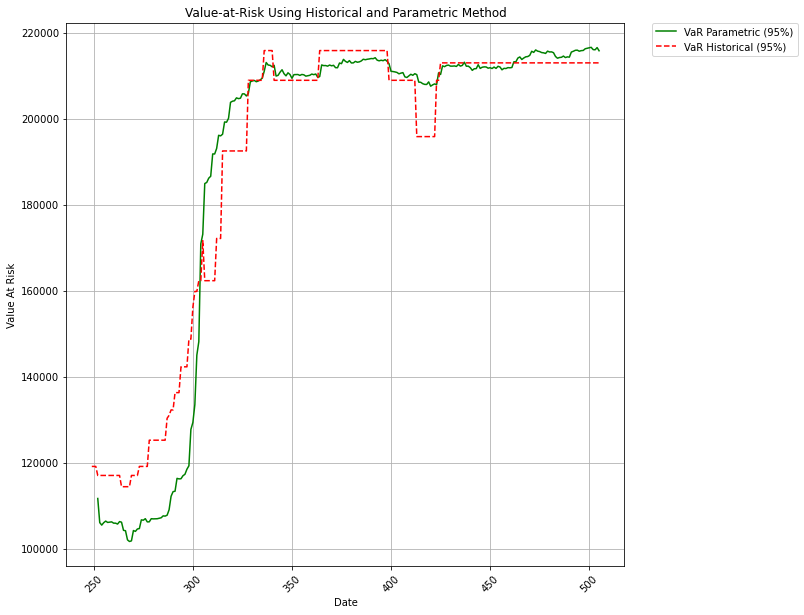

In [34]:
plt.figure(figsize=(10,10))
plt.plot(portfolio['index'], -portfolio['Var_Para_95'], 'g-', label='VaR Parametric (95%)')
plt.plot(portfolio['index'], -portfolio['Var_Hist_95'], 'r--', label='VaR Historical (95%)')

plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk Using Historical and Parametric Method')
plt.show()

In [35]:
portfolio

,index,NVDA_weight,QCOM_weight,NXPI_weight,MU_weight,MRVL_weight,AMD_weight,MCHP_weight,AVGO_weight,XLNX_weight,...,SMTC_todate_lgr,SYNA_todate_lgr,AOSL_todate_lgr,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95
0,0,0.023129,0.036781,0.049427,0.022097,0.011072,0.012874,0.048250,0.159620,0.057694,...,NaN,NaN,NaN,NaN,"[0.023129115738774783, 0.036781289119986973, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN
1,1,0.023470,0.036893,0.050328,0.022682,0.011222,0.013059,0.047604,0.158258,0.058507,...,NaN,NaN,NaN,NaN,"[0.023470137293704563, 0.03689327074288504, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN
2,2,0.023604,0.038320,0.051673,0.022981,0.011481,0.012657,0.047362,0.154329,0.060267,...,NaN,NaN,NaN,NaN,"[0.02360431086063036, 0.03832047977672753, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN
3,3,0.024169,0.037471,0.052128,0.023327,0.011377,0.013573,0.047424,0.149968,0.060679,...,NaN,NaN,NaN,NaN,"[0.024169197981061735, 0.037470884328084146, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN
4,4,0.024986,0.036686,0.051561,0.023813,0.011424,0.014427,0.047925,0.150241,0.061150,...,NaN,NaN,NaN,NaN,"[0.0249861575309315, 0.03668578415105286, 0.05...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.037372,0.042211,0.044905,0.020287,0.013512,0.026426,0.039040,0.121379,0.040870,...,"[0.008409882210915562, 0.006828566026111719, 0...","[-0.00916129586461657, -0.0077244178682347045,...","[-0.00956242052558468, 0.006629869872306749, 0...","[[0.0013582756070600333, 0.0008925548358533764...","[0.03737242833117798, 0.04221077597406428, 0.0...","[0.003154709605840631, 0.002116222533581767, 0...",0.001005,0.001777,-216594.421549,-212975.30703
502,502,0.037164,0.041982,0.045219,0.020343,0.013514,0.026409,0.038955,0.121696,0.040801,...,"[0.006828566026111719, 0.01798473100679408, -0...","[-0.0077244178682347045, 0.007422672839111295,...","[0.006629869872306749, 0.004395642183625909, -...","[[0.0013563012304458333, 0.0008918004233970933...","[0.03716354028305565, 0.04198152757079854, 0.0...","[0.0032275233478735368, 0.0021824253945361884,...",0.001003,0.001839,-216060.725158,-212975.30703
503,503,0.037691,0.042651,0.045055,0.020432,0.013442,0.026409,0.039061,0.122202,0.040770,...,"[0.01798473100679408, -0.01628485053580772, -0...","[0.007422672839111295, 0.028858090990362305, 0...","[0.004395642183625909, -0.011764830029498071, ...","[[0.0013563712067727884, 0.0008923588370017832...","[0.037691051299904424, 0.04265058539666785, 0....","[0.0031475769390111267, 0.002163154472438042, ...",0.001001,0.001813,-216018.332563,-212975.30703
504,504,0.037564,0.042263,0.045197,0.020538,0.013553,0.026391,0.038791,0.121532,0.040635,...,"[-0.01628485053580772, -0.017898467776672252, ...","[0.028858090990362305, 0.023189533387551, -0.0...","[-0.011764830029498071, -0.03003232967976516, ...","[[0.0013553046302836602, 0.0008921626949853767...","[0.03756366204690843, 0.042263139072525664, 0....","[0.003083354364067464, 0.002162609166918165, 0...",0.001000,0.001669,-216531.543335,-212975.30703


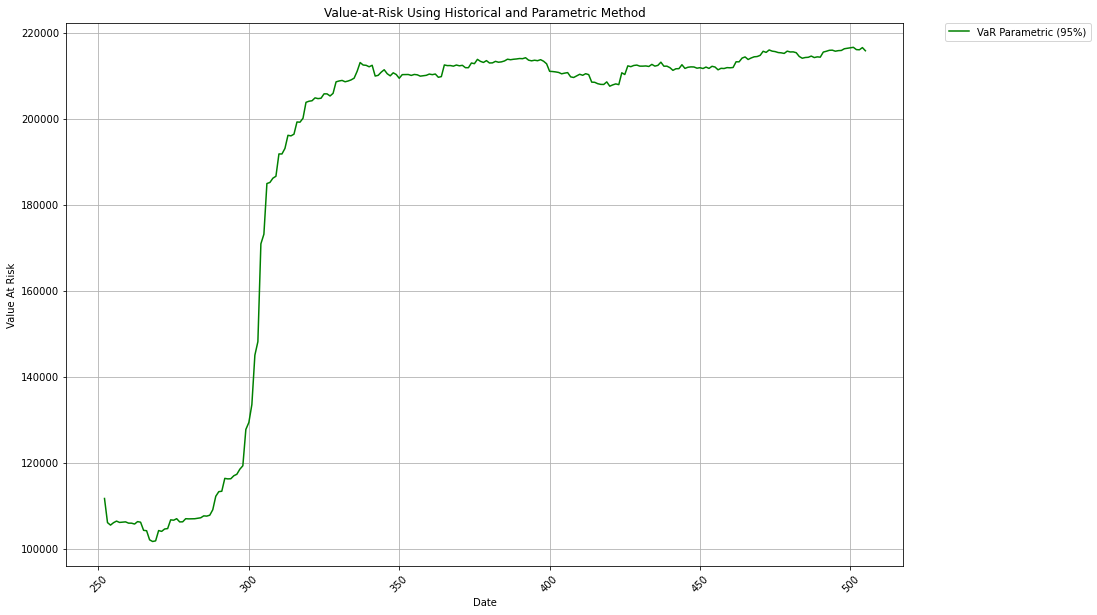

In [36]:
plt.figure(figsize=(15,10))
plt.plot(portfolio['index'], -portfolio['Var_Para_95'], 'g-', label='VaR Parametric (95%)')


plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk Using Historical and Parametric Method')
plt.show()

In [37]:
portfolio['Date'] = df['Date']

In [38]:
portfolio

,index,NVDA_weight,QCOM_weight,NXPI_weight,MU_weight,MRVL_weight,AMD_weight,MCHP_weight,AVGO_weight,XLNX_weight,...,SYNA_todate_lgr,AOSL_todate_lgr,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95,Date
0,0,0.023129,0.036781,0.049427,0.022097,0.011072,0.012874,0.048250,0.159620,0.057694,...,NaN,NaN,NaN,"[0.023129115738774783, 0.036781289119986973, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2018-12-31
1,1,0.023470,0.036893,0.050328,0.022682,0.011222,0.013059,0.047604,0.158258,0.058507,...,NaN,NaN,NaN,"[0.023470137293704563, 0.03689327074288504, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-02
2,2,0.023604,0.038320,0.051673,0.022981,0.011481,0.012657,0.047362,0.154329,0.060267,...,NaN,NaN,NaN,"[0.02360431086063036, 0.03832047977672753, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-03
3,3,0.024169,0.037471,0.052128,0.023327,0.011377,0.013573,0.047424,0.149968,0.060679,...,NaN,NaN,NaN,"[0.024169197981061735, 0.037470884328084146, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-04
4,4,0.024986,0.036686,0.051561,0.023813,0.011424,0.014427,0.047925,0.150241,0.061150,...,NaN,NaN,NaN,"[0.0249861575309315, 0.03668578415105286, 0.05...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.037372,0.042211,0.044905,0.020287,0.013512,0.026426,0.039040,0.121379,0.040870,...,"[-0.00916129586461657, -0.0077244178682347045,...","[-0.00956242052558468, 0.006629869872306749, 0...","[[0.0013582756070600333, 0.0008925548358533764...","[0.03737242833117798, 0.04221077597406428, 0.0...","[0.003154709605840631, 0.002116222533581767, 0...",0.001005,0.001777,-216594.421549,-212975.30703,2020-12-24
502,502,0.037164,0.041982,0.045219,0.020343,0.013514,0.026409,0.038955,0.121696,0.040801,...,"[-0.0077244178682347045, 0.007422672839111295,...","[0.006629869872306749, 0.004395642183625909, -...","[[0.0013563012304458333, 0.0008918004233970933...","[0.03716354028305565, 0.04198152757079854, 0.0...","[0.0032275233478735368, 0.0021824253945361884,...",0.001003,0.001839,-216060.725158,-212975.30703,2020-12-28
503,503,0.037691,0.042651,0.045055,0.020432,0.013442,0.026409,0.039061,0.122202,0.040770,...,"[0.007422672839111295, 0.028858090990362305, 0...","[0.004395642183625909, -0.011764830029498071, ...","[[0.0013563712067727884, 0.0008923588370017832...","[0.037691051299904424, 0.04265058539666785, 0....","[0.0031475769390111267, 0.002163154472438042, ...",0.001001,0.001813,-216018.332563,-212975.30703,2020-12-29
504,504,0.037564,0.042263,0.045197,0.020538,0.013553,0.026391,0.038791,0.121532,0.040635,...,"[0.028858090990362305, 0.023189533387551, -0.0...","[-0.011764830029498071, -0.03003232967976516, ...","[[0.0013553046302836602, 0.0008921626949853767...","[0.03756366204690843, 0.042263139072525664, 0....","[0.003083354364067464, 0.002162609166918165, 0...",0.001000,0.001669,-216531.543335,-212975.30703,2020-12-30


In [39]:
print(portfolio.iloc[505]['Var_Para_95'])
print(portfolio.iloc[505]['Var_Hist_95'])
print(portfolio.iloc[505]['Date'])
print("\n")
print(portfolio.iloc[441]['Var_Para_95'])
print(portfolio.iloc[441]['Var_Hist_95'])
print(portfolio.iloc[441]['Date'])
print("\n")
print(portfolio.iloc[335]['Var_Para_95'])
print(portfolio.iloc[335]['Var_Hist_95'])
print(portfolio.iloc[335]['Date'])
print("\n")
print(portfolio.iloc[273]['Var_Para_95'])
print(portfolio.iloc[273]['Var_Hist_95'])
print(portfolio.iloc[273]['Date'])


-215792.83941649742
-212975.30702954327
2020-12-31 00:00:00


-211237.80603855517
-212975.30702954327
2020-09-30 00:00:00


-209416.1907183488
-208920.3925864974
2020-04-30 00:00:00


-104659.7870490175
-119112.74499293586
2020-01-31 00:00:00


## Expected shortfall, historical simulation

In [41]:

ES_Hist_95 = []

alpha = 0.05
for index, row in portfolio.iterrows():
    if index < 252:
        ES_Hist_95.append(np.nan)
    else:
        sum_of_var = 0
        count = 0
        VaR = row['Var_Hist_95']
        log_returns_sorted = sorted(row['log_returns'])
        length = len(log_returns_sorted)
        cutoff_rt0_index = math.floor(length*alpha +1) - 1
        sum_rt0 = sum(log_returns_sorted[:cutoff_rt0_index])
        ES_hist = sum_rt0/len(log_returns_sorted[:cutoff_rt0_index])
        ES_Hist_95.append(ES_hist)
        
                
                #print(f"the var is {VaR}, the return is{i}")
                #count += 1
                #print(f"The total number of values is {count}")
                
portfolio['ES_Hist_95'] = ES_Hist_95
portfolio

,index,NVDA_weight,QCOM_weight,NXPI_weight,MU_weight,MRVL_weight,AMD_weight,MCHP_weight,AVGO_weight,XLNX_weight,...,AOSL_todate_lgr,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95,Date,ES_Hist_95
0,0,0.023129,0.036781,0.049427,0.022097,0.011072,0.012874,0.048250,0.159620,0.057694,...,NaN,NaN,"[0.023129115738774783, 0.036781289119986973, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2018-12-31,NaN
1,1,0.023470,0.036893,0.050328,0.022682,0.011222,0.013059,0.047604,0.158258,0.058507,...,NaN,NaN,"[0.023470137293704563, 0.03689327074288504, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-02,NaN
2,2,0.023604,0.038320,0.051673,0.022981,0.011481,0.012657,0.047362,0.154329,0.060267,...,NaN,NaN,"[0.02360431086063036, 0.03832047977672753, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-03,NaN
3,3,0.024169,0.037471,0.052128,0.023327,0.011377,0.013573,0.047424,0.149968,0.060679,...,NaN,NaN,"[0.024169197981061735, 0.037470884328084146, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-04,NaN
4,4,0.024986,0.036686,0.051561,0.023813,0.011424,0.014427,0.047925,0.150241,0.061150,...,NaN,NaN,"[0.0249861575309315, 0.03668578415105286, 0.05...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.037372,0.042211,0.044905,0.020287,0.013512,0.026426,0.039040,0.121379,0.040870,...,"[-0.00956242052558468, 0.006629869872306749, 0...","[[0.0013582756070600333, 0.0008925548358533764...","[0.03737242833117798, 0.04221077597406428, 0.0...","[0.003154709605840631, 0.002116222533581767, 0...",0.001005,0.001777,-216594.421549,-212975.30703,2020-12-24,-0.000921
502,502,0.037164,0.041982,0.045219,0.020343,0.013514,0.026409,0.038955,0.121696,0.040801,...,"[0.006629869872306749, 0.004395642183625909, -...","[[0.0013563012304458333, 0.0008918004233970933...","[0.03716354028305565, 0.04198152757079854, 0.0...","[0.0032275233478735368, 0.0021824253945361884,...",0.001003,0.001839,-216060.725158,-212975.30703,2020-12-28,-0.000847
503,503,0.037691,0.042651,0.045055,0.020432,0.013442,0.026409,0.039061,0.122202,0.040770,...,"[0.004395642183625909, -0.011764830029498071, ...","[[0.0013563712067727884, 0.0008923588370017832...","[0.037691051299904424, 0.04265058539666785, 0....","[0.0031475769390111267, 0.002163154472438042, ...",0.001001,0.001813,-216018.332563,-212975.30703,2020-12-29,-0.000863
504,504,0.037564,0.042263,0.045197,0.020538,0.013553,0.026391,0.038791,0.121532,0.040635,...,"[-0.011764830029498071, -0.03003232967976516, ...","[[0.0013553046302836602, 0.0008921626949853767...","[0.03756366204690843, 0.042263139072525664, 0....","[0.003083354364067464, 0.002162609166918165, 0...",0.001000,0.001669,-216531.543335,-212975.30703,2020-12-30,-0.000736


## Expected shortfall, parametric simulation

In [42]:
ES_Para_95 = []

for index, row in portfolio.iterrows():
    if index < 252:
        ES_Para_95.append(np.nan)

    else:
        mu = np.mean(row['log_returns'])
        sigma = np.std(row['log_returns'])
        es_99 = mu+sigma*norm.pdf(norm.ppf(0.99, loc=0, scale=1), loc=0, scale=1)/(1-0.99)
        es_95 = mu+sigma*norm.pdf(norm.ppf(0.95, loc=0, scale=1), loc=0, scale=1)/(1-0.95)
        ES_Para_95.append(es_95)
        
#df = pd.DataFrame({99:ES_Para_99,95:ES_95})
    
portfolio['ES_Para_95'] = ES_Para_95
#df
portfolio

,index,NVDA_weight,QCOM_weight,NXPI_weight,MU_weight,MRVL_weight,AMD_weight,MCHP_weight,AVGO_weight,XLNX_weight,...,covariance_matrix,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95,Date,ES_Hist_95,ES_Para_95
0,0,0.023129,0.036781,0.049427,0.022097,0.011072,0.012874,0.048250,0.159620,0.057694,...,NaN,"[0.023129115738774783, 0.036781289119986973, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2018-12-31,NaN,NaN
1,1,0.023470,0.036893,0.050328,0.022682,0.011222,0.013059,0.047604,0.158258,0.058507,...,NaN,"[0.023470137293704563, 0.03689327074288504, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-02,NaN,NaN
2,2,0.023604,0.038320,0.051673,0.022981,0.011481,0.012657,0.047362,0.154329,0.060267,...,NaN,"[0.02360431086063036, 0.03832047977672753, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-03,NaN,NaN
3,3,0.024169,0.037471,0.052128,0.023327,0.011377,0.013573,0.047424,0.149968,0.060679,...,NaN,"[0.024169197981061735, 0.037470884328084146, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-04,NaN,NaN
4,4,0.024986,0.036686,0.051561,0.023813,0.011424,0.014427,0.047925,0.150241,0.061150,...,NaN,"[0.0249861575309315, 0.03668578415105286, 0.05...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.037372,0.042211,0.044905,0.020287,0.013512,0.026426,0.039040,0.121379,0.040870,...,"[[0.0013582756070600333, 0.0008925548358533764...","[0.03737242833117798, 0.04221077597406428, 0.0...","[0.003154709605840631, 0.002116222533581767, 0...",0.001005,0.001777,-216594.421549,-212975.30703,2020-12-24,-0.000921,0.004657
502,502,0.037164,0.041982,0.045219,0.020343,0.013514,0.026409,0.038955,0.121696,0.040801,...,"[[0.0013563012304458333, 0.0008918004233970933...","[0.03716354028305565, 0.04198152757079854, 0.0...","[0.0032275233478735368, 0.0021824253945361884,...",0.001003,0.001839,-216060.725158,-212975.30703,2020-12-28,-0.000847,0.004791
503,503,0.037691,0.042651,0.045055,0.020432,0.013442,0.026409,0.039061,0.122202,0.040770,...,"[[0.0013563712067727884, 0.0008923588370017832...","[0.037691051299904424, 0.04265058539666785, 0....","[0.0031475769390111267, 0.002163154472438042, ...",0.001001,0.001813,-216018.332563,-212975.30703,2020-12-29,-0.000863,0.004705
504,504,0.037564,0.042263,0.045197,0.020538,0.013553,0.026391,0.038791,0.121532,0.040635,...,"[[0.0013553046302836602, 0.0008921626949853767...","[0.03756366204690843, 0.042263139072525664, 0....","[0.003083354364067464, 0.002162609166918165, 0...",0.001000,0.001669,-216531.543335,-212975.30703,2020-12-30,-0.000736,0.004378


In [43]:
print(portfolio.iloc[505]['ES_Para_95'])
print(portfolio.iloc[505]['ES_Hist_95'])
print(portfolio.iloc[505]['Date'])
print("\n")
print(portfolio.iloc[441]['ES_Para_95'])
print(portfolio.iloc[441]['ES_Hist_95'])
print(portfolio.iloc[441]['Date'])
print("\n")
print(portfolio.iloc[335]['ES_Para_95'])
print(portfolio.iloc[335]['ES_Hist_95'])
print(portfolio.iloc[335]['Date'])
print("\n")
print(portfolio.iloc[273]['ES_Para_95'])
print(portfolio.iloc[273]['ES_Hist_95'])
print(portfolio.iloc[273]['Date'])

0.00455397961064795
-0.0007389740696161013
2020-12-31 00:00:00


0.004065578579542382
-0.00012049171575339357
2020-09-30 00:00:00


0.0034989752722303243
-0.0011385358668058489
2020-04-30 00:00:00


0.004128704960376064
-0.0009464125604732941
2020-01-31 00:00:00


In [44]:
df["log_return_nextday"] = df["log_returns"].shift(-1)
portfolio['log_return_nextday'] = df['log_return_nextday']

In [45]:
log_returns_2020 = portfolio[253:]['log_return_nextday']
date_2020 = portfolio[253:]['Date']
date_2020

lg_returns = pd.DataFrame({'returns':log_returns_2020,'date':date_2020})
lg_returns

,returns,date
253,-77052.661234,2020-01-02
254,-64139.857919,2020-01-03
255,94387.300346,2020-01-06
256,1494.968904,2020-01-07
257,25957.876815,2020-01-08
...,...,...
501,-4675.002610,2020-12-24
502,-35999.414006,2020-12-28
503,87340.945005,2020-12-29
504,35128.346955,2020-12-30


In [46]:
portfolio

,index,NVDA_weight,QCOM_weight,NXPI_weight,MU_weight,MRVL_weight,AMD_weight,MCHP_weight,AVGO_weight,XLNX_weight,...,weight_matrix,log_returns,variance,weighted_returns,Var_Para_95,Var_Hist_95,Date,ES_Hist_95,ES_Para_95,log_return_nextday
0,0,0.023129,0.036781,0.049427,0.022097,0.011072,0.012874,0.048250,0.159620,0.057694,...,"[0.023129115738774783, 0.036781289119986973, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2018-12-31,NaN,NaN,69871.426202
1,1,0.023470,0.036893,0.050328,0.022682,0.011222,0.013059,0.047604,0.158258,0.058507,...,"[0.023470137293704563, 0.03689327074288504, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-02,NaN,NaN,-283772.555175
2,2,0.023604,0.038320,0.051673,0.022981,0.011481,0.012657,0.047362,0.154329,0.060267,...,"[0.02360431086063036, 0.03832047977672753, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-03,NaN,NaN,225238.093904
3,3,0.024169,0.037471,0.052128,0.023327,0.011377,0.013573,0.047424,0.149968,0.060679,...,"[0.024169197981061735, 0.037470884328084146, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-04,NaN,NaN,115089.596341
4,4,0.024986,0.036686,0.051561,0.023813,0.011424,0.014427,0.047925,0.150241,0.061150,...,"[0.0249861575309315, 0.03668578415105286, 0.05...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,2019-01-07,NaN,NaN,-23679.356190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.037372,0.042211,0.044905,0.020287,0.013512,0.026426,0.039040,0.121379,0.040870,...,"[0.03737242833117798, 0.04221077597406428, 0.0...","[0.003154709605840631, 0.002116222533581767, 0...",0.001005,0.001777,-216594.421549,-212975.30703,2020-12-24,-0.000921,0.004657,-4675.002610
502,502,0.037164,0.041982,0.045219,0.020343,0.013514,0.026409,0.038955,0.121696,0.040801,...,"[0.03716354028305565, 0.04198152757079854, 0.0...","[0.0032275233478735368, 0.0021824253945361884,...",0.001003,0.001839,-216060.725158,-212975.30703,2020-12-28,-0.000847,0.004791,-35999.414006
503,503,0.037691,0.042651,0.045055,0.020432,0.013442,0.026409,0.039061,0.122202,0.040770,...,"[0.037691051299904424, 0.04265058539666785, 0....","[0.0031475769390111267, 0.002163154472438042, ...",0.001001,0.001813,-216018.332563,-212975.30703,2020-12-29,-0.000863,0.004705,87340.945005
504,504,0.037564,0.042263,0.045197,0.020538,0.013553,0.026391,0.038791,0.121532,0.040635,...,"[0.03756366204690843, 0.042263139072525664, 0....","[0.003083354364067464, 0.002162609166918165, 0...",0.001000,0.001669,-216531.543335,-212975.30703,2020-12-30,-0.000736,0.004378,35128.346955


In [47]:
portfolio_bt = deepcopy(portfolio)
portfolio_bt = portfolio_bt[253:]
portfolio_bt

exception_parametric_date = portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']]['Date']
exception_historical_date = portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']]['Date']

In [48]:
print(f'There are {len(exception_parametric_date)} days where losses exceed VaR using parametric')
print(f'There are {len(exception_historical_date)} days where losses exceed VaR using historical')

There are 21 days where losses exceed VaR using parametric
There are 20 days where losses exceed VaR using historical


In [49]:
observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05


print("VaR 95% Historical Method") 
print("VaR level: %s" %(0.95))
print("Observed level: %s" %(observed_level))
print("Observations: %s" %(observations))
print("Failures: %s" %(failures)) 
print("Expected: %s" %(expected))

VaR 95% Historical Method
VaR level: 0.95
Observed level: 0.9209486166007905
Observations: 253
Failures: 20
Expected: 12.65


In [50]:
#Parametric

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05


print("VaR 95% Parametric Method") 
print("VaR level: %s" %(0.99))
print("Observed level: %s" %(observed_level))
print("Observations: %s" %(observations))
print("Failures: %s" %(failures)) 
print("Expected: %s" %(expected))

VaR 95% Parametric Method
VaR level: 0.99
Observed level: 0.9169960474308301
Observations: 253
Failures: 21
Expected: 12.65


In [51]:
#parametric
from scipy.stats import binom

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected
backtesting_alpha = 0.05 #backtesting confidence interval
p_value_95 = 1-binom.cdf(failures, observations, 0.05)
print("P-value of VaR 95%: ", p_value_95)
if(p_value_95 < backtesting_alpha):
    print("Reject null hypothesis under binomial distribution, using parametric method")
else:
    print(f"Not enough evidence to reject null at {backtesting_alpha} backtesting significance level under binomial distribution, using parametric method")

P-value of VaR 95%:  0.008874783434514422
Reject null hypothesis under binomial distribution, using parametric method


In [52]:
#Historical
from scipy.stats import binom

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected
backtesting_alpha = 0.05 #backtesting confidence interval
p_value_95 = 1-binom.cdf(failures, observations, 0.05)
print("P-value of VaR 95%: ", p_value_95)
if(p_value_95 < backtesting_alpha):
    print("Reject null hypothesis under binomial distribution, using historical method")
else:
    print(f"Not enough evidence to reject null at {backtesting_alpha} backtesting significance level under binomial distribution, using historical method")

P-value of VaR 95%:  0.01675977383821814
Reject null hypothesis under binomial distribution, using historical method


In [53]:
# Calculate p value for 99% VaR based on normal distribution
#Parametric
# Calculate p value for 95% VaR based on normal distribution


from scipy.stats import norm

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Para_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected

z_score = (failures-expected)/sqrt(expected*0.95)
p_VaR_95 = 1-norm.cdf(z_score, 0, 1)
print("z score: ", z_score)
print("P-value of VaR 95%: ", p_VaR_95)
if(p_VaR_95 < backtesting_alpha):
    print("Reject null hypothesis using parametric method")
else:
    print(f"Not enough evidence to reject null {backtesting_alpha} backtesting significance level under normal distribution using parametric method ")

z score:  2.4086816833348976
P-value of VaR 95%:  0.008005127608379459
Reject null hypothesis using parametric method


In [54]:
#Historical
from scipy.stats import norm

observed_level = 1 - len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])/len(portfolio_bt)
observations = len(portfolio_bt)
failures = len(portfolio_bt[portfolio_bt['Var_Hist_95']>portfolio_bt['log_return_nextday']])
expected = observations*0.05
ratio = failures/expected

z_score = (failures-expected)/sqrt(expected*0.95)
p_VaR_99 = 1-norm.cdf(z_score, 0, 1)
print("z score: ", z_score)
print("P-value of VaR 99%: ", p_VaR_95)
if(p_VaR_95 < backtesting_alpha):
    print("Reject null hypothesis using parametric method")
else:
    print(f"Not enough evidence to reject null {backtesting_alpha} backtesting significance level under normal distribution using parametric method ")

z score:  2.120216811079221
P-value of VaR 99%:  0.008005127608379459
Reject null hypothesis using parametric method


In [55]:
#Historical
from copy import deepcopy
df_95 = deepcopy(portfolio_bt)

# ind_t: indicate whether exception at t; 
# ind_t1: indicate whether exception at t-1
df_95['ind_t'] = df_95.apply(lambda row: 1 if row['Var_Hist_95']>row['log_return_nextday'] else 0, axis=1)
df_95['ind_t1'] = df_95['ind_t'].shift(1)

# 'ind_00' — indicate periods with no failures followed by a period with no failures
# 'ind_10' — indicate periods with failures followed by a period with no failures
# 'ind_01' — indicate periods with no failures followed by a period with failures
# 'ind_11' — indicate periods with failures followed by a period with failures
df_95['ind_00'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_10'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==1 else 0, axis=1)
df_95['ind_01'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_11'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==1 else 0, axis=1)

# Drop missing values
df_95.dropna(inplace=True)

# 'N00' — Number of periods with no failures followed by a period with no failures
# 'N10' — Number of periods with failures followed by a period with no failures
# 'N01' — Number of periods with no failures followed by a period with failures
# 'N11' — Number of periods with failures followed by a period with failures


N00, N10, N01, N11 = df_95[['ind_00','ind_10','ind_01','ind_11']].sum(axis=0)

# p01 = Probability of having a failure on period t, given that there was no failure on period t–1
# p11 = Probability of having a failure on period t, given that there was a failure on period t–1


In [56]:
df_95

,index,NVDA_weight,QCOM_weight,NXPI_weight,MU_weight,MRVL_weight,AMD_weight,MCHP_weight,AVGO_weight,XLNX_weight,...,Date,ES_Hist_95,ES_Para_95,log_return_nextday,ind_t,ind_t1,ind_00,ind_10,ind_01,ind_11
254,254,0.025095,0.035645,0.053102,0.023210,0.011263,0.020715,0.043870,0.125173,0.041691,...,2020-01-03,0.000537,0.004735,-64139.857919,0,0.0,1,0,0,0
255,255,0.025377,0.035685,0.053097,0.022962,0.010921,0.020770,0.043544,0.125862,0.041108,...,2020-01-06,0.000288,0.004601,94387.300346,0,0.0,1,0,0,0
256,256,0.025285,0.036128,0.052948,0.024587,0.010989,0.020388,0.045742,0.123475,0.041392,...,2020-01-07,0.000317,0.004584,1494.968904,0,0.0,1,0,0,0
257,257,0.025270,0.035934,0.052950,0.024211,0.010879,0.020161,0.045053,0.121636,0.041174,...,2020-01-08,0.000220,0.004503,25957.876815,0,0.0,1,0,0,0
258,258,0.025429,0.036251,0.053041,0.024011,0.010849,0.020545,0.045266,0.120099,0.041946,...,2020-01-09,0.000163,0.004516,-23283.991704,0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,0.037741,0.042052,0.045159,0.020280,0.013444,0.026579,0.039156,0.120727,0.041223,...,2020-12-23,-0.000938,0.004618,31322.285117,0,0.0,1,0,0,0
501,501,0.037372,0.042211,0.044905,0.020287,0.013512,0.026426,0.039040,0.121379,0.040870,...,2020-12-24,-0.000921,0.004657,-4675.002610,0,0.0,1,0,0,0
502,502,0.037164,0.041982,0.045219,0.020343,0.013514,0.026409,0.038955,0.121696,0.040801,...,2020-12-28,-0.000847,0.004791,-35999.414006,0,0.0,1,0,0,0
503,503,0.037691,0.042651,0.045055,0.020432,0.013442,0.026409,0.039061,0.122202,0.040770,...,2020-12-29,-0.000863,0.004705,87340.945005,0,0.0,1,0,0,0


In [57]:
N00, N10, N01, N11


(214, 17, 17, 3)

## Parametric independence

In [58]:
#Historical
from copy import deepcopy
df_95 = deepcopy(portfolio_bt)

# ind_t: indicate whether exception at t; 
# ind_t1: indicate whether exception at t-1
df_95['ind_t'] = df_95.apply(lambda row: 1 if row['Var_Para_95']>row['log_return_nextday'] else 0, axis=1)
df_95['ind_t1'] = df_95['ind_t'].shift(1)

# 'ind_00' — indicate periods with no failures followed by a period with no failures
# 'ind_10' — indicate periods with failures followed by a period with no failures
# 'ind_01' — indicate periods with no failures followed by a period with failures
# 'ind_11' — indicate periods with failures followed by a period with failures
df_95['ind_00'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_10'] = df_95.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==1 else 0, axis=1)
df_95['ind_01'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==0 else 0, axis=1)
df_95['ind_11'] = df_95.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==1 else 0, axis=1)

# Drop missing values
df_95.dropna(inplace=True)

# 'N00' — Number of periods with no failures followed by a period with no failures
# 'N10' — Number of periods with failures followed by a period with no failures
# 'N01' — Number of periods with no failures followed by a period with failures
# 'N11' — Number of periods with failures followed by a period with failures


N00, N10, N01, N11 = df_95[['ind_00','ind_10','ind_01','ind_11']].sum(axis=0)

# p01 = Probability of having a failure on period t, given that there was no failure on period t–1
# p11 = Probability of having a failure on period t, given that there was a failure on period t–1


In [59]:
N00, N10, N01, N11

(213, 17, 17, 4)

In [60]:
for item in stocks_data:
    stock_return = {}
    stock_return[item] = stocks_data[item]['Adj Close']#* num_shares[item]
    all_returns.append(stock_return)

all_returns 

[{'NVDA': Date
  2018-12-31     33.165485
  2019-01-02     33.841225
  2019-01-03     31.796640
  2019-01-04     33.833771
  2019-01-07     35.624954
                   ...    
  2020-12-24    129.839996
  2020-12-28    128.903214
  2020-12-29    129.335373
  2020-12-30    131.358871
  2020-12-31    130.452057
  Name: Adj Close, Length: 506, dtype: float64},
 {'QCOM': Date
  2018-12-31     52.741718
  2019-01-02     53.195831
  2019-01-03     51.620338
  2019-01-04     52.454422
  2019-01-07     52.306137
                   ...    
  2020-12-24    146.649475
  2020-12-28    145.614594
  2020-12-29    146.353821
  2020-12-30    147.792786
  2020-12-31    150.148407
  Name: Adj Close, Length: 506, dtype: float64},
 {'NXPI': Date
  2018-12-31     70.874229
  2019-01-02     72.566780
  2019-01-03     69.607224
  2019-01-04     72.972977
  2019-01-07     73.514595
                   ...    
  2020-12-24    156.010971
  2020-12-28    156.843918
  2020-12-29    154.602875
  2020-12-30    158.

In [61]:
stocks_adj_returns = get_data_for_multiple_stocks(tickers)[2]
total_portfolio_value = 0
pps = {}

for item in col_names:
    new_df = pd.DataFrame(stocks_adj_returns[item])
    value = new_df.iloc[253]['Adj Close']  #* num_shares[item]
    #print(f"{item}: {value} {num_shares[item]}")
    total_portfolio_value += value
    pps[item] = value

pps

    


{'NVDA': 59.833770751953125,
 'QCOM': 85.23181915283203,
 'NXPI': 125.79685974121094,
 'MU': 55.31268310546875,
 'MRVL': 27.127023696899414,
 'AMD': 49.099998474121094,
 'MCHP': 105.23179626464844,
 'AVGO': 301.33160400390625,
 'XLNX': 100.11534881591797,
 'LRCX': 291.0453186035156,
 'ON': 25.059999465942383,
 'INTC': 58.26591491699219,
 'TXN': 123.73091125488281,
 'ENPH': 29.34000015258789,
 'AMAT': 61.03724670410156,
 'CRUS': 85.0,
 'JBL': 41.377220153808594,
 'ADI': 116.50666809082031,
 'OLED': 211.5386962890625,
 'TSM': 57.80479431152344,
 'IIVI': 35.31999969482422,
 'DIOD': 57.29999923706055,
 'AEIS': 71.49348449707031,
 'MTSI': 26.299999237060547,
 'TTMI': 15.15999984741211,
 'FLEX': 12.779999732971191,
 'MXL': 21.549999237060547,
 'SMTC': 53.86000061035156,
 'SYNA': 66.26000213623047,
 'AOSL': 13.680000305175781}

In [62]:
stocks_adj_returns = get_data_for_multiple_stocks(tickers)[2]
total_portfolio_value = 0

for item in col_names:
    new_df = pd.DataFrame(stocks_adj_returns[item])
    value = new_df.iloc[253]['Adj Close']  * num_shares[item]
    total_portfolio_value += value
    print(value)
    
total_portfolio_value

10412452.287567139
17960560.322799683
22959436.46508789
20659950.892089844
14705206.894781113
13536869.579315186
17394921.15434265
15405578.254699707
15663046.322250366
13488786.335998535
15835564.022525787
21486371.848449707
10232546.360778809
2259180.0117492676
7239017.459106445
9819880.0
6532470.009002686
4878134.1929626465
5218871.176147461
2838215.400695801
2098007.9818725586
3546869.952774048
2850016.265991211
1554329.9549102783
3535160.36441803
2253459.0129156113
1516020.8963279724
1885100.0213623047
1477598.0476379395
861840.0192260742


270105461.50778675